In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import joblib
from sklearn import linear_model

In [2]:
# Read file
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


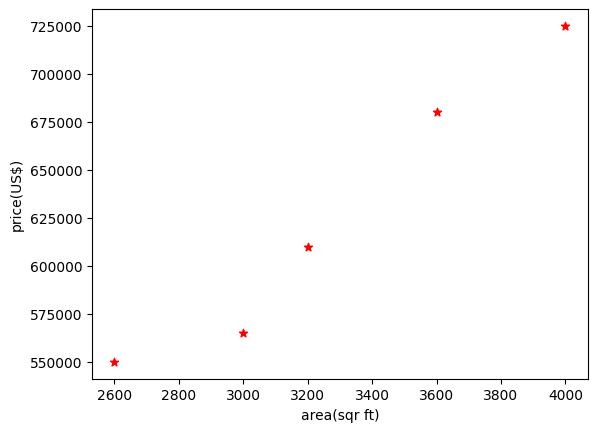

In [3]:
plt.xlabel('area(sqr ft)') # add x label 
plt.ylabel('price(US$)') # add y label

plt.scatter(df.area,df.price,color = 'red',marker='*') # scatter function from Matplotlib.

In [4]:
""" Train the regression mode """ 
reg = linear_model.LinearRegression() # This line creates an instance of the LinearRegression class, named reg
reg.fit(df[['area']],df.price) # df means Data Frame
""" 
price = m*area + b
y = m*x + c

so price is dependent and area is independent
so we need to predict price against area,
""" 

' \nprice = m*area + b\ny = m*x + c\n\nso price is dependent and area is independent\nso we need to predict price against area,\n'

Predict The Price

In [5]:
# new_area = pd.DataFrame([[3300]],columns=['area'])
# predict_price = reg.predict(new_area)
# predict_price

reg.predict([[5500]]) # provide the data in 2D shape, otherwise it gives error

c:\Users\Kawsar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([927448.63013699])

In [6]:
reg.coef_ # value of coefficent which is m in y = mx + c

array([135.78767123])

In [7]:
reg.intercept_ # value of intercept which is c in y = mx + c

180616.43835616432

In [8]:
# y = m*x + c
""" 
m = coefficent = 135.78767123
c = intercept = 180616.43835616432
x = area = input data which we want to predict
""" 
res = 135.78767123 * 3300 + 180616.43835616432
res

628715.7534151643

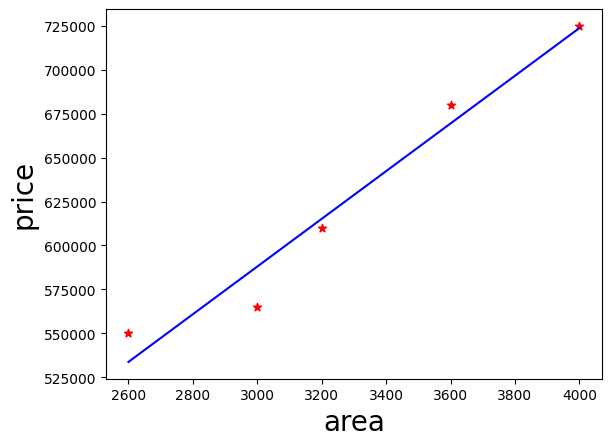

In [9]:
plt.xlabel('area',fontsize=20) # add x label 
plt.ylabel('price',fontsize=20) # add y label

plt.scatter(df.area,df.price,color = 'red',marker='*')
plt.plot(df.area,reg.predict(df[['area']]),color = 'blue')

Now predict some arae using a data area data set

In [10]:
new_d = pd.read_csv('areas.csv')
new_d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [11]:
new_d.head(3)

,area
0,1000
1,1500
2,2300


In [12]:
res = reg.predict(new_d)

In [13]:
new_d['Prices'] = res 

In [14]:
new_d

,area,Prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [15]:
# Read in CSV file
new_d.to_csv("Predicted_Price.csv",index=False)

In [16]:
import pickle

In [22]:
with open('mode_pickel','wb') as f:
    pickle.dump(reg,f)

In [23]:
with open('mode_pickel','rb') as f:
    mp = pickle.load(f)

In [25]:
mp.predict([[5500]])

c:\Users\Kawsar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([927448.63013699])

Using Sykit learn

In [32]:
joblib.dump(reg,'mode_joblib')

['mode_joblib']

In [34]:
mj = joblib.load('mode_joblib')

In [36]:
mj.predict(5000)

c:\Users\Kawsar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=5000.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.